# Basic Viewer
Ingest the alphas data and try to recreate an image using full sorting.

## Inspect the data.

In [42]:
import polars as pl

In [43]:
data = pl.scan_csv('data/alpha_vals.csv', infer_schema_length=757)
data.head().collect()

pixelNum,out_color_r,out_color_g,out_color_b,bg_color_r,bg_color_g,bg_color_b,Gaussian_0_alpha,Gaussian_0_depth,Gaussian_0_color_r,Gaussian_0_color_g,Gaussian_0_color_b,Gaussian_1_alpha,Gaussian_1_depth,Gaussian_1_color_r,Gaussian_1_color_g,Gaussian_1_color_b,Gaussian_2_alpha,Gaussian_2_depth,Gaussian_2_color_r,Gaussian_2_color_g,Gaussian_2_color_b,Gaussian_3_alpha,Gaussian_3_depth,Gaussian_3_color_r,Gaussian_3_color_g,Gaussian_3_color_b,Gaussian_4_alpha,Gaussian_4_depth,Gaussian_4_color_r,Gaussian_4_color_g,Gaussian_4_color_b,Gaussian_5_alpha,Gaussian_5_depth,Gaussian_5_color_r,Gaussian_5_color_g,Gaussian_5_color_b,…,Gaussian_142_color_g,Gaussian_142_color_b,Gaussian_143_alpha,Gaussian_143_depth,Gaussian_143_color_r,Gaussian_143_color_g,Gaussian_143_color_b,Gaussian_144_alpha,Gaussian_144_depth,Gaussian_144_color_r,Gaussian_144_color_g,Gaussian_144_color_b,Gaussian_145_alpha,Gaussian_145_depth,Gaussian_145_color_r,Gaussian_145_color_g,Gaussian_145_color_b,Gaussian_146_alpha,Gaussian_146_depth,Gaussian_146_color_r,Gaussian_146_color_g,Gaussian_146_color_b,Gaussian_147_alpha,Gaussian_147_depth,Gaussian_147_color_r,Gaussian_147_color_g,Gaussian_147_color_b,Gaussian_148_alpha,Gaussian_148_depth,Gaussian_148_color_r,Gaussian_148_color_g,Gaussian_148_color_b,Gaussian_149_alpha,Gaussian_149_depth,Gaussian_149_color_r,Gaussian_149_color_g,Gaussian_149_color_b
i64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0.816958,0.582506,0.349349,0,0,0,0.004149,4.89715,0.266108,0.328284,0.169247,0.004166,5.77093,0.896588,0.370032,0.0943832,0.008228,7.40858,1.17165,0.853375,0.221689,0.0363499,7.69578,0.819721,0.586835,0.354065,0.0778933,7.6974,0.815328,0.564429,0.347331,0.011101,7.69983,0.831183,0.594355,0.37644,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.765177,0.523946,0.276409,0,0,0,0.004116,4.89715,0.266108,0.328284,0.169247,0.004113,5.77093,0.896588,0.370032,0.0943832,0.008287,7.40858,1.17165,0.853375,0.221689,0.007049,7.69338,0.629764,0.397353,0.177138,0.0373361,7.6974,0.815328,0.564429,0.347331,0.006836,7.70673,0.815867,0.580568,0.376779,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.667211,0.440587,0.220319,0,0,0,0.004083,4.89715,0.266108,0.328284,0.169247,0.004061,5.77093,0.896588,0.370032,0.0943832,0.008344,7.40858,1.17165,0.853375,0.221689,0.0148661,7.69338,0.629764,0.397353,0.177138,0.016208,7.6974,0.815328,0.564429,0.347331,0.017113,7.70549,0.673684,0.446163,0.224626,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.633949,0.414435,0.202898,0,0,0,0.00405,4.89715,0.266108,0.328284,0.169247,0.004008,5.77093,0.896588,0.370032,0.0943832,0.008401,7.40858,1.17165,0.853375,0.221689,0.0293894,7.69338,0.629764,0.397353,0.177138,0.007505,7.69641,0.651232,0.359302,0.0,0.006372,7.6974,0.815328,0.564429,0.347331,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.630513,0.402237,0.185783,0,0,0,0.004017,4.89715,0.266108,0.328284,0.169247,0.003955,5.77093,0.896588,0.370032,0.0943832,0.008456,7.40858,1.17165,0.853375,0.221689,0.0544626,7.69338,0.629764,0.397353,0.177138,0.0142788,7.69641,0.651232,0.359302,0.0,0.0324201,7.70549,0.673684,0.446163,0.224626,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create image from out color.

In [44]:
import matplotlib.pyplot as plt
from PIL import Image

In [45]:
# Select the out color columns.
out_colors_raw = data.select(pl.col("out_color_r", "out_color_g", "out_color_b")).collect().to_numpy()

In [46]:
# Get the width and height of the image.
ground_truth_image = Image.open('data/gt.png')
image_width = ground_truth_image.width
image_height = ground_truth_image.height

### Convert linearized RGB data to w x h x 3 image.

In [47]:
out_colors = out_colors_raw.reshape((image_height, image_width, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0332].


(np.float64(-0.5), np.float64(1263.5), np.float64(831.5), np.float64(-0.5))

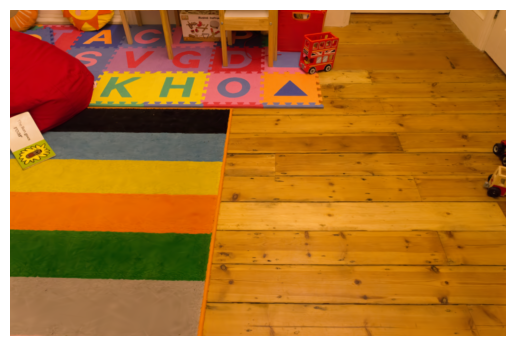

In [48]:
plt.imshow(out_colors)
plt.axis('off')